# Decision tree
- Iris dataset
- 2 features
- Multiclass

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
import os
imagePath = os.path.join(os.getcwd(),'Images')
if (not(os.path.isdir(imagePath))):
    os.mkdir(imagePath)

In [35]:
# Read data
iris = datasets.load_iris()

In [36]:
# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

In [37]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [38]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
param = "ex2"
paramSetAll = {
    "ex1": {"criterion": "gini", "max_depth": 4, "min_samples_split": 2},
    "ex2": {"criterion": "entropy", "max_depth": 4, "min_samples_split": 2},
    "ex3": {"criterion": "gini", "max_depth": 8, "min_samples_split": 2},
    "ex4": {"criterion": "entropy", "max_depth": 8, "min_samples_split": 2},
}
paramValue = paramSetAll[param]

In [40]:
# Creating objects
tree_model = DecisionTreeClassifier(**paramValue)

In [41]:
# Training
tree_model.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
# Prediction
y_pred = tree_model.predict(X_test_std)

In [43]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [44]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [45]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 3
Accuracy score: 0.9333333333333333


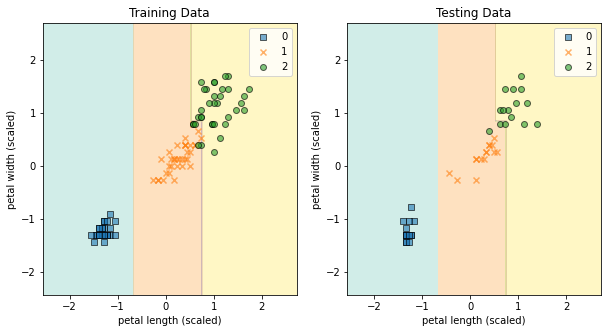

In [46]:
filenamePNG = "Images/T41_DT_" + param + ".png"
plot_decision_surface_train_test(
    X_train_std, X_test_std, y_train, y_test, tree_model, filename=filenamePNG
)

['sepal length (scaled)', 'sepal width (scaled)', 'petal length (scaled)', 'petal width (scaled)']


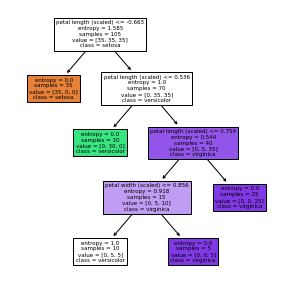

In [47]:
#Create label names
fn = [ st.replace("(cm)", "(scaled)") for st in iris.feature_names]
print(fn)

# Visualization: Plot tree
fig, ax = plt.subplots(1, figsize=(5, 5))
tree.plot_tree(
    tree_model,
    feature_names=fn[2:4],
    class_names=iris.target_names,
    filled=True,
)
filenamePDF = "Images/T41_tree_visualize_1_" + param + ".pdf"
fig.savefig(filenamePDF) 

### dtreeviz
- https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
- https://github.com/parrt/dtreeviz
- https://graphviz.org/download/
- https://anaconda.org/conda-forge/cairosvg

In [48]:
import graphviz
from dtreeviz.trees import dtreeviz  # remember to load the package
import cairosvg

viz = dtreeviz(
    tree_model,
    X_train_std,
    y,
    target_name="target",
    feature_names=fn[2:4],
    class_names=list(iris.target_names),
)

viz
filenameSVG = "Images/T41_tree_visualize_2_" + param + ".svg"
viz.save(filenameSVG)

filenamePDF2 = "Images/T41_tree_visualize_2_" + param + ".pdf"
cairosvg.svg2pdf(url=filenameSVG, write_to=filenamePDF2)